# Problem Statement

Subsidy Inc. delivers subsidies to individuals based on their income, Accurate income data is one of the hardest piece of data to obtain accross the world, Subsidy Inc. has obtained a large data set of authenticated data on individual income,demographic parameters, and a few financial parameters

Subsidy Inc.Wishes us to : Develop an Income Classifier System for Individuals

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data_income=pd.read_csv('income.csv') # Importing data
data=data_income.copy() # copying original data
data.head(5) # displaying data set

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


# Getting to know  the Data

In [3]:
data.info() # To check variables data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [4]:
data.isnull().sum() # Checking for missing values

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

**_No missing values_**

In [5]:
data.describe() # summary of numerical variable

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [6]:
data.describe(include='O') # Summary of categorical variable

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [7]:
data['JobType'].value_counts() # Frequency of JobType

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [8]:
data['occupation'].value_counts() # Frequency of occupation

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
# checking for unique class
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [10]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

**_There exists   '?'   instead of nan_**

In [11]:
# Converting ' ?' values into nan
data=pd.read_csv('income.csv',na_values=[' ?'])

# Data Pre-Processing

In [12]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

**_There is missing values in JobType and occupation_**

In [13]:
missing=data[data.isnull().any(axis=1)] 
# axis=1 => to consider atleast one column value is missing
missing.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [14]:
data2=data.dropna(axis=0) # Dropping missing values

In [15]:
data.shape # Shape of data set before dropping missing value

(31978, 13)

In [16]:
data2.shape # Shape of data set after dropping missing value

(30162, 13)

In [17]:
# Relationship between independent variable
correlation=data2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


# Cross table and Data visualization

In [18]:
data2.columns # Extracting the column names

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [19]:
# Gender Proportation table
pd.crosstab(index=data2['gender'],columns='count',normalize=True)

col_0,count
gender,
Female,0.324315
Male,0.675685


In [20]:
# Gender vs Salary status
pd.crosstab(index=data2['gender'],columns=data2['SalStat'],margins=True,normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


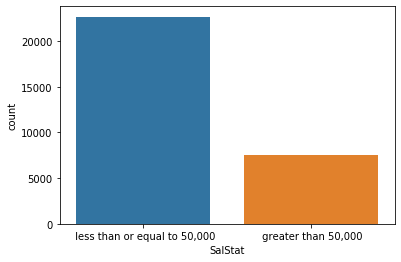

In [21]:
# Frequency distribution of salary status
sns.countplot(data2['SalStat'])

**_75 % of peoples salary status is <=50,000_**

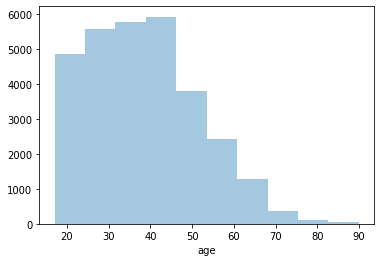

In [22]:
sns.distplot(data2['age'],bins=10,kde=False) # Histogram of age

**_People with 25 - 45 age are high in frequency_**

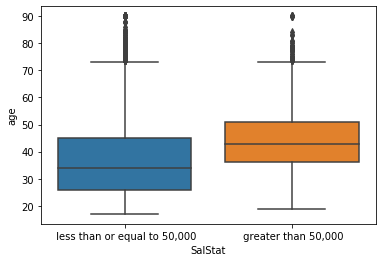

In [23]:
# Boxplot Age vs Salary Status
sns.boxplot('SalStat','age',data=data2)

**_People with 35 - 50 age are more likely to earn > 50,000 USD_**

**_People with 25 - 35 age are more likely to earn <= 50,000 USD_**

# Exploratory Data Analysis

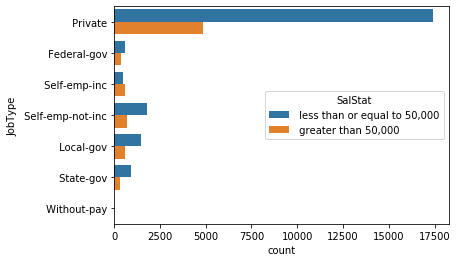

In [24]:
# Barplot JoType vs Salary Status
sns.countplot(y='JobType',data=data2,hue='SalStat')

**_Self-employed earns greater than 50,000 USD / year_**

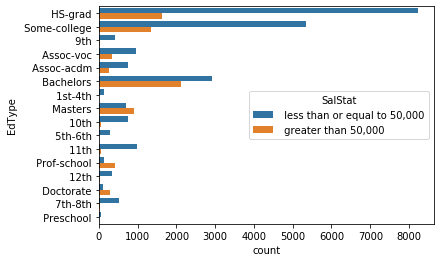

In [25]:
# Barplot Education vs Salary status
sns.countplot(y='EdType',data=data2,hue='SalStat')

**_Masters,Prof-school,Doctorate earns 50,000 USD / Year_**

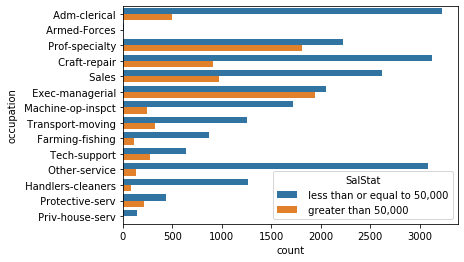

In [26]:
# Barplot occupation vs Salary Status
sns.countplot(y='occupation',data=data2,hue='SalStat')

**_Pro-specialty and Exec-managerial are highly earns more than 50,000 USD / year_**

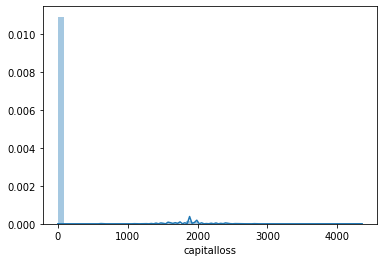

In [27]:
# histogram for capital loss
sns.distplot(data2['capitalloss'])

**_95 % Capital loss is zero_**

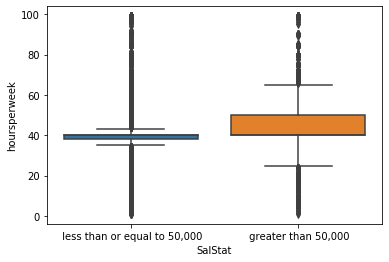

In [28]:
# Boxplot Salary Status vs Hours per week
sns.boxplot(x=data2['SalStat'],y=data2['hoursperweek'])

**_From the plot it is clearly visible that those who make more than 50,000 USD ? Year are more likely to spend 40-50 hours per week_**

# Logistic Regression

In [29]:
# Getting dummi values for machine learning
new_data=pd.get_dummies(data2,drop_first=True)
new_data.head(5)

,age,capitalgain,capitalloss,hoursperweek,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,"SalStat_ less than or equal to 50,000"
0,45,0,0,28,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,44,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,27,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,0,0,35,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [39]:
# Storing the column names
columns_list=list(new_data.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty

In [40]:
# seperating the input names from the data
features=list(set(columns_list)-set(['SalStat']))
features

['nativecountry_ United-States',
 'JobType_ Private',
 'gender_ Male',
 'nativecountry_ Cuba',
 'nativecountry_ Hungary',
 'EdType_ Assoc-voc',
 'nativecountry_ South',
 'nativecountry_ Columbia',
 'EdType_ HS-grad',
 'EdType_ Prof-school',
 'occupation_ Sales',
 'race_ Other',
 'relationship_ Other-relative',
 'JobType_ Self-emp-inc',
 'EdType_ Masters',
 'EdType_ 11th',
 'occupation_ Protective-serv',
 'nativecountry_ Ecuador',
 'nativecountry_ Greece',
 'nativecountry_ Dominican-Republic',
 'EdType_ 5th-6th',
 'JobType_ Self-emp-not-inc',
 'nativecountry_ Holand-Netherlands',
 'nativecountry_ Trinadad&Tobago',
 'nativecountry_ Germany',
 'nativecountry_ Mexico',
 'race_ Black',
 'occupation_ Other-service',
 'nativecountry_ Italy',
 'relationship_ Wife',
 'nativecountry_ England',
 'EdType_ Some-college',
 'nativecountry_ France',
 'EdType_ Preschool',
 'nativecountry_ Hong',
 'occupation_ Prof-specialty',
 'nativecountry_ China',
 'nativecountry_ Taiwan',
 'EdType_ 9th',
 'JobType_

In [47]:
# Storing the output variables in y
y=new_data['SalStat_ less than or equal to 50,000'].values
y

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [48]:
# Storing the values from input features
x=new_data[features].values
x

array([[1, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 0]], dtype=int64)

In [49]:
# Splitting the data set into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [73]:
# Make instance of the model
logistic=LogisticRegression(solver='liblinear')

In [74]:
# fitting the values for x and y
logistic.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
# Predicting test_x 
prediction=logistic.predict(test_x)
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [76]:
# Accuracy of this model
accuracy=accuracy_score(test_y,prediction)
accuracy

1.0

In [78]:
# Miss Classified Sample
print('Missclassified samples:%d'%(test_y!=prediction).sum())

Missclassified samples:0
